패키지 로드

In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [161]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

### 함수 설정

In [9]:
def kw_in_df(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [10]:
def kw_in_nouns(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [401]:
def kw_in_token(data, keyword):
    print('전체 리뷰', len(data), '건 중', "'", keyword, "' 가 포함된 리뷰 총", len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ReviewText']

In [11]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [12]:
def wc_kw(data, kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        print(keyword, '키워드가 포함된 리뷰의 용언 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        print(keyword, '키워드가 포함된 리뷰의 명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    elif kw_option == 3:
        print(keyword, '키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'] + data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    else:
        return print('옵션 확인')

In [13]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [389]:
def product_kw_frequency(data, keyword):
    return data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ProductName'].value_counts()

In [449]:
def kw_rate(data, keyword_list):
    for keyword in keyword_list:
        print('전체 리뷰', len(data), '건 중 "', keyword, '" 가 포함된 리뷰 비율 :', round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2), '%')
    #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)

### 데이터 로드

In [6]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv", index_col=0)
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [7]:
for data in [kakao_data, kurly_data, workerbee_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x: eval(x))
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x: eval(x))

In [4]:
kakao_data.rename(columns = {'review_text':'ReviewText'}, inplace = True)

In [3]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,review_text,rating,review_tag1,review_tag2,review_time,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"['숙취', '후', '아침', '물', '포', '수', '스틱', '형', '휴...","['따뜻하', '타', '먹', '있', '좋', '이', '간편하', '녹', '..."


### 카카오 리뷰 태그 전처리

In [13]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원          739
생일          592
감사          188
위로          187
건강           28
설날           16
결혼           15
시험           15
재미           14
취업/이직        12
스승의날         10
크리스마스         9
졸업/입학         6
어버이날          4
화이트데이         4
빼빼로데이         4
새해            4
임신/출산         4
추석            3
명절선물          3
명절            3
선물            3
코로나           2
선물용           2
추석선물          2
이사/집들이        2
발렌타인데이        2
건강회복          2
아프지마          2
쾌유            1
비밀            1
피로회복          1
목감기에좋다고       1
인연            1
목감기           1
석류꿀맛최고이다      1
퓨어석류아카        1
건강영양석류        1
면역력챙기기        1
감사마음          1
연말            1
꿀빠는시간         1
회복            1
어머님선물         1
기념품           1
감사의표시         1
임직축하          1
달달하시간         1
녹차원꿀스틱        1
사과            1
달달건강꿀스틱       1
선물용으로줌        1
백일/돌          1
코로나건강         1
면역역챙기기        1
감솨            1
200일선물        1
설             1
좋습니다          1
꿀             1
벌꿀            1
프로폴리스       

In [8]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구          865
직장동료        350
선/후배        209
형제/자매       121
나            97
연인           76
선생님          44
제자           37
자녀           28
부모님          26
썸            11
지인            6
조카            5
친척            2
언니            2
스트리머          1
선물            1
교회언니          1
핑크님           1
게임단톡방         1
감사합니다         1
고마운분          1
엠에이치글로비즈      1
직장            1
아들친구어머니       1
그냥선물          1
거래처선물         1
퓨어석류아카        1
동기            1
학부모님선물        1
친구딸           1
보낸이의정성        1
홀인원기념         1
나에게주는선물       1
삼실킬로미터        1
전도사님          1
학부모님          1
가족            1
생일            1
응원과건강기원       1
딸남자친구         1
건강            1
생일선물          1
선물용           1
학부형           1
형님            1
코로나응원위로       1
아이친구엄마        1
고객님           1
회원님           1
추석선물          1
동생            1
비마스터          1
학부            1
꿀             1
꿀해장           1
교회집사님         1
화줌마HZM        1
Name: count, dtype: int64

In [6]:
tag2 = ['친구', '연인', '썸', '형재/자매', '선/후배', '직장동료', '자녀', '부모님', '제자', '선생님', '나']
tag1 = ['생일', '응원', '감사', '재미', '결혼', '이사/집들이', '백일/돌', '임신/출산', '졸업/입학', '취업/이직', '시험', '위로', '사과', '반려동물', '설날', '건강', '스승의날']

In [7]:
kakao_data['review_tag1'] = kakao_data['review_tag1'].apply(lambda x:x if x in tag1 else '기타')

In [8]:
kakao_data['review_tag2'] = kakao_data['review_tag2'].apply(lambda x:x if x in tag2 else '기타')

In [36]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원        739
생일        592
감사        188
위로        187
기타         92
건강         28
설날         16
시험         15
결혼         15
재미         14
취업/이직      12
스승의날       10
졸업/입학       6
임신/출산       4
이사/집들이      2
백일/돌        1
사과          1
Name: count, dtype: int64

In [35]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구      865
직장동료    350
선/후배    209
기타      179
나        97
연인       76
선생님      44
제자       37
자녀       28
부모님      26
썸        11
Name: count, dtype: int64

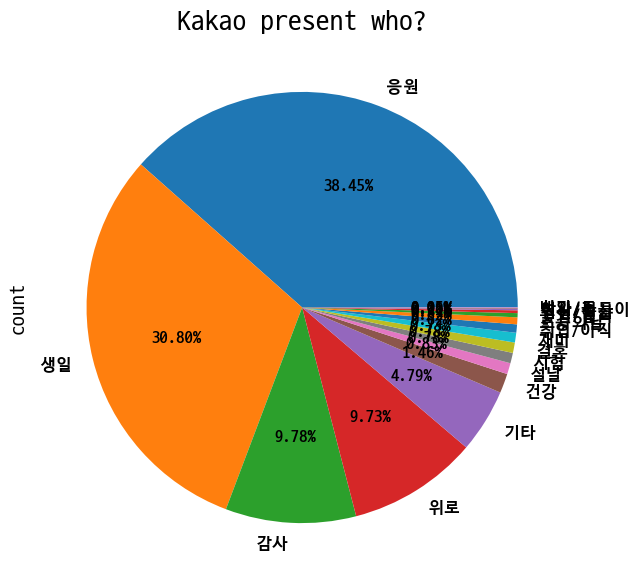

In [14]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag1'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

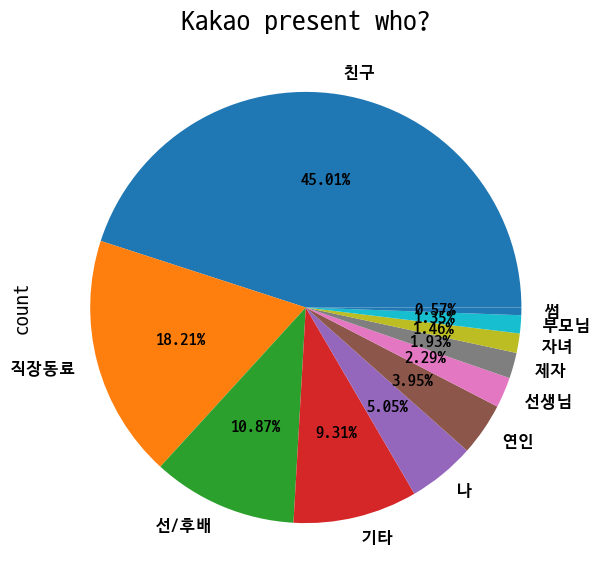

In [15]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag2'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

### 카톡 선물하기 분석

In [132]:
kakao_data.head(1)

,ProductCode,ProductName,brand,sellingPrice,wishCount,reviewCount,product_tag2,ReviewText,rating,review_tag1,review_tag2,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"[숙취, 후, 아침, 물, 수, 형, 휴대, 물, 주머니, 가방, 안, 휴대, 때,...","[따뜻하, 타, 간편하, 녹, 간편하, 허기지, 간편하, 믿, 빠르]"


In [47]:
kakao_noun_frequency = frequency_analysis(kakao_data['token_nouns_bareun'], 500)

In [48]:
kakao_noun_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kakao_noun_frequency.xlsx")

In [388]:
workerbee_data[workerbee_data['ProductName']=='[킷캔] 우리쌀 꿀떡만들기 키트'].head(1)

,ProductCode,ProductName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,ReviewText,isGift,ReviewTime,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
3955,954061,[킷캔] 우리쌀 꿀떡만들기 키트,32800,3690,279,5723439,[],saul***,5,간편하고 재미있게 떡 만들기 해보기 좋아요 유치원 다니는 조카에게 선물했더니 하루종일 재밌게 놀았어요! 맛도 먹을만해요!,F,2023-05-22 00:22:23,"[떡, 유치원, 조카, 선물, 하루, 종일, 맛]","[간편하, 재미있, 만들, 다니, 재밌, 놀]",1,0.993583


In [466]:
product_kw_frequency(kakao_data, '고급')

ProductName
국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5            96
이십삼쩜오(-23.5) 100% 국내산 천연 벌꿀 허니스틱 30포 (쇼핑백 증정)          8
"하루한포" 국내산 100% 천연꿀 허니스틱30포                            3
국산 프로폴리스 혼합 천연벌꿀 허니스틱(60스틱)답례품 비마스터-23.5               2
국산 아카시아 천연벌꿀 허니스틱 (60스틱)답례품 비마스터-23.5 쇼핑백증정            2
미엘드 국내산 100% 천연벌꿀 허니스틱 2종(아카시아,야생화) 선물세트               2
국산 천연 벌꿀 아카시아 야생화 허니스틱 2구 선물세트                         2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 10포 선물용 답례품                2
국산 천연 벌꿀 아카시아꿀 허니스틱 틴케이스 15포                           2
미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,답례품)     2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 30포 선물용                    2
"[꿀프로] -타이틀리스트PRO V1 골프공 혼합 SET" / 아카시아+프로폴리스 꿀스틱      1
[허니바이허니] "국산 천연벌꿀" 허니스틱 4구 틴케이스 선물세트                   1
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용                    1
[허니바이허니] "국산 천연벌꿀" 허니스틱 2구 틴케이스 선물세트                   1
Name: count, dtype: int64

In [467]:
kw_rate(kakao_data[kakao_data['ProductName']=='국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5'], ['고급', '깔끔', '예쁘', '귀엽'])

전체 리뷰 1000 건 중 " 고급 " 가 포함된 리뷰 비율 : 9.6 %
전체 리뷰 1000 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.1 %
전체 리뷰 1000 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 0.9 %
전체 리뷰 1000 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 0.0 %


In [433]:
kw_in_token(workerbee_data[workerbee_data['ProductName']=='[초코꿀] 워커비 미니팩 초코 120g(10gx12ea)'], '달')

전체 리뷰 26 건 중 ' 달 ' 가 포함된 리뷰 총 4 건


3571                                                                                                                                           초코가 안 달고 너무 맛있었어요
3572                                                                                                          안달고 엄청 맛있어요. 그냥 먹어도 맛있고 커피에 타도 맛있네용. 또 사먹으려구용ㅎㅎㅎㅎㅎ
3581                                                                                        달고 맛있어요! 그냥 먹기엔 너무 달고, 우유에 2포정도 넣어서 먹으면 좋아요. 패키지까지 예뻐서 선물용으로 딱 좋습니다-
3587    워커비 다른 맛을 다 맛있게 먹어서 좋은기회에 주문했어요 그냥 쭉 짜서 먹었는데 진한초코맛 꿀입니다  우유에 타서 마셔야겠어요 레몬맛은 그냥 짜서 막 먹었는데 저한테 초코맛은 많이 달아서 우유나 따뜻한물에 마시거나 빵에 발라 먹으려구요 먹기도 간편하고 패키지가 넘 귀여워요
Name: ReviewText, dtype: object

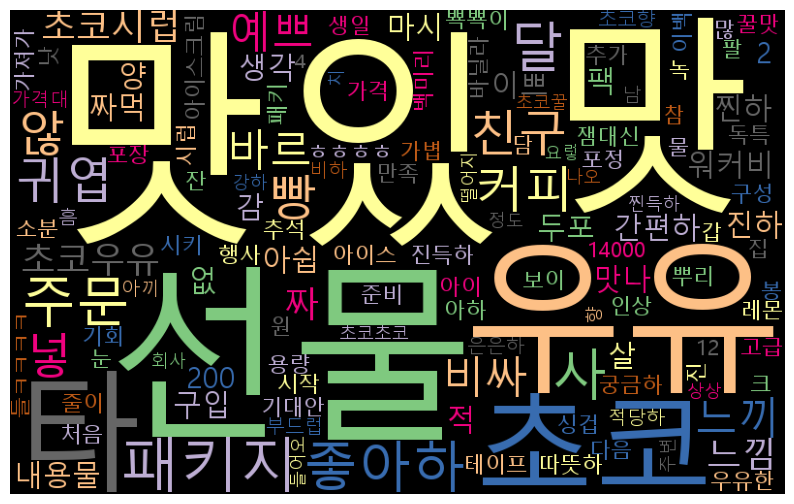

In [428]:
wc_analysis(workerbee_data[workerbee_data['ProductName']=='[초코꿀] 워커비 미니팩 초코 120g(10gx12ea)']['token_nouns_bareun'] + 
            workerbee_data[workerbee_data['ProductName']=='[초코꿀] 워커비 미니팩 초코 120g(10gx12ea)']['token_verbs_bareun'])

In [397]:
frequency_analysis(workerbee_data[workerbee_data['ProductName']=='[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)']['token_nouns_bareun'], 20)

,Token,Frequency
0,선물,40
1,맛,28
2,레몬,23
3,패키지,14
4,물,12
5,포장,11
6,탄산수,11
7,친구,9
8,향,8
9,당,6


박스 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


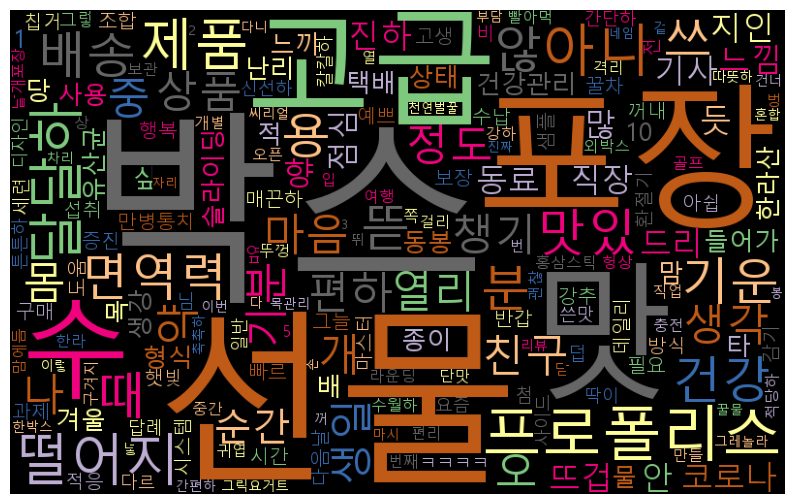

In [46]:
wc_kw(kakao_data, 3, '박스')

때 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


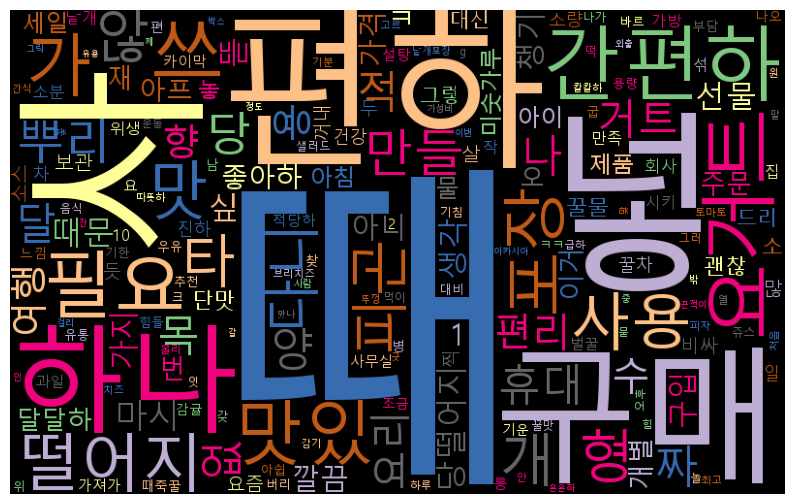

In [97]:
wc_kw(kurly_data, 3, '때')

In [64]:
kurly_jeju = kurly_data[kurly_data['ProductCode']==5026039]

패키지 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


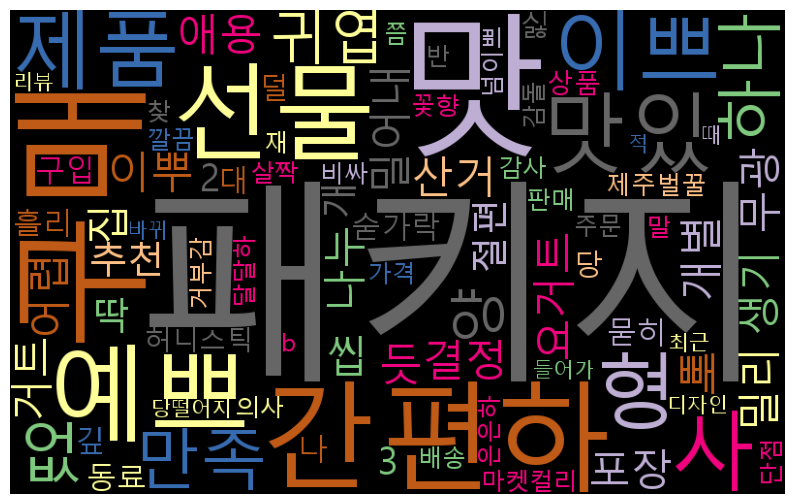

In [69]:
wc_kw(kurly_jeju, 3, '패키지')

귀엽 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


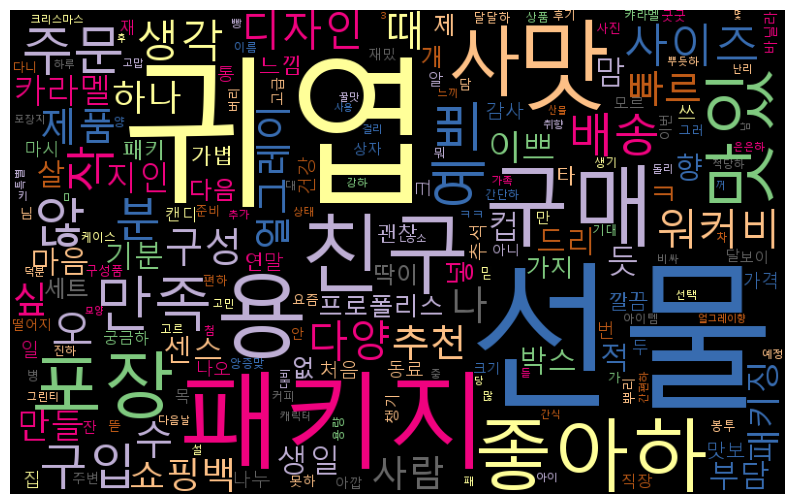

In [108]:
wc_kw(workerbee_data, 3, '귀엽')

In [392]:
product_kw_frequency(workerbee_data, '귀엽')

ProductName
[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g           175
[꿀선물] 워커비 기프트세트 미니자(8개입)             169
[꿀선물] 워커비 기프트세트 미니자(3-4개입)           162
[29CM 단독] 워커비 해피팩                    111
[보이스케어 KIT] 워커비 프로폴리스 스프레이 & 캔디       60
[킷캔] 우리쌀 꿀떡만들기 키트                     58
워커비 무설탕 프로폴리스 캔디 24정                  48
[꿀카라멜] 워커비 허니 그린티 카라멜 50g             30
[고마운 마음] DEAR. FRIENDS                28
[꿀선물] 워커비 기프트세트 보틀                    23
[바닐라꿀] 워커비 보틀 바닐라 355g                20
[꿀선물] 워커비 기프트세트 콤보                    18
[29CM 단독] 워커비 더블 미니팩(6개입x2)           17
[아카시아꿀] 워커비 보틀 오리지널 355g              16
[꿀선물] 워커비 기프트세트 미니팩                   14
[꿀선물] 허니 홈카페 키트                       13
워커비 허니 바닐라 30g                        12
[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)       12
워커비 허니 레몬 30g                         10
[존경의 마음] DEAR. TEACHERS                8
[레몬꿀] 워커비 보틀 레몬 355g                   7
[감사한 마음] DEAR. PARENTS                 7
워커비 허니 모히또 30g                         6
[건강기능식품] 워커비 프로폴리스 스프레이 20ml           6
[얼그레

In [391]:
product_kw_frequency(kurly_data, '요거트')

ProductName
[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형)        634
[YOZM] 허니스틱 10포                 265
[올리] 아카시아꿀 스틱 10포               159
[바로생활] 아카시아꿀 스틱 10포             130
[제주벌꿀영농조합법인] 제주 감귤꽃 벌꿀(스틱형)     110
[바로생활] 야생화꿀 스틱 10포               86
[바로생활] 때죽꿀 스틱 10포                20
[송강당] 들과 바람 머금은 꽃꿀 스틱            14
[콤비타] 뉴질랜드 마누카꿀 5+ 사셰             9
[올리] 꿀스틱 세트                       5
[선물세트] QB 마누카 꿀스틱 UMF 5+ 30포      3
[허니바이허니] 올인원 허니스틱 (90포)           3
[올리] 꿀세트 쇼핑백                      1
[미엘드] 스틱벌꿀 2종 선물세트                1
[콤비타] 뉴질랜드 마누카꿀 5+ 사셰 (12일분)      1
Name: count, dtype: int64

In [390]:
product_kw_frequency(kakao_data, '고급')

ProductName
국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5            96
이십삼쩜오(-23.5) 100% 국내산 천연 벌꿀 허니스틱 30포 (쇼핑백 증정)          8
"하루한포" 국내산 100% 천연꿀 허니스틱30포                            3
국산 프로폴리스 혼합 천연벌꿀 허니스틱(60스틱)답례품 비마스터-23.5               2
국산 아카시아 천연벌꿀 허니스틱 (60스틱)답례품 비마스터-23.5 쇼핑백증정            2
미엘드 국내산 100% 천연벌꿀 허니스틱 2종(아카시아,야생화) 선물세트               2
국산 천연 벌꿀 아카시아 야생화 허니스틱 2구 선물세트                         2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 10포 선물용 답례품                2
국산 천연 벌꿀 아카시아꿀 허니스틱 틴케이스 15포                           2
미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,답례품)     2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 30포 선물용                    2
"[꿀프로] -타이틀리스트PRO V1 골프공 혼합 SET" / 아카시아+프로폴리스 꿀스틱      1
[허니바이허니] "국산 천연벌꿀" 허니스틱 4구 틴케이스 선물세트                   1
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용                    1
[허니바이허니] "국산 천연벌꿀" 허니스틱 2구 틴케이스 선물세트                   1
Name: count, dtype: int64

용언 제거

In [48]:
kakao_friend = kakao_data[kakao_data['review_tag2']=='친구']

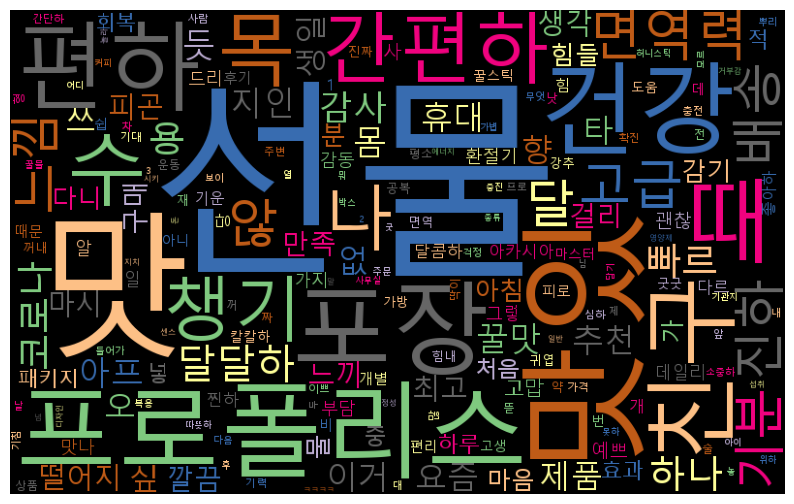

In [49]:
wc_analysis(kakao_friend['token_nouns_bareun']+kakao_friend['token_verbs_bareun'])

In [ ]:
frequency_analysis(kakao_friend['token_nouns_bareun'], 500)

In [ ]:
kakao_data['']

### 부정리뷰 분석

In [21]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [48]:
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

컬럼명 맞춰주기 : 리뷰, 시간

In [84]:
workerbee_data.rename(columns={'contents':'ReviewText', 'insertTimestamp':'ReviewTime',
                               'itemNo':'ProductCode', 'itemName':'ProductName'}, inplace=True)

In [30]:
kurly_data.rename(columns={'ReviewDate':'ReviewTime'}, inplace=True)

In [82]:
kakao_data.rename(columns={'review_time':'ReviewTime', 'id':'ProductCode', 'name':'ProductName'}, inplace=True)

### 불용어 제거

단어변환

In [371]:
change_tokens_dict = {'거트':'요거트', '릭요거트':'요거트', '그릭요거트':'요거트', '이쁘':'예쁘', '패키징':'패키지', '패키':'패키지', '요거트볼':'요거트',
                      '요거':'요거트', '꿀요거트':'요거트', '여거트':'요거트'}

In [340]:
def change_token(data, change_dict):
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[change_tokens_dict[token] if token in change_tokens_dict.keys() else token for token in x])

In [373]:
change_token(kurly_data, change_tokens_dict)

In [374]:
kurly_data.iloc[1821, :]

ProductCode                            5026039
MemberGrade                                 퍼플
MemberName                                 노**
ProductName           [제주벌꿀영농조합법인] 제주 벌꿀 (스틱형)
ReviewText                 맛있어요 요거트먹을때 쓰기 딱좋아요
ReviewTime                          2022.09.17
ReviewLike                                   0
sentiment_label                              1
sentiment_score                       0.979713
token_nouns_bareun                    [요거트, 때]
token_verbs_bareun                  [맛있, 트, 쓰]
Name: 1821, dtype: object

In [ ]:
list(set(kw_in_df(kurly_data, '거트').index) - set(kw_in_nouns(kurly_data, '요거트').index))

In [103]:
kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:'거트' in x)]

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewTime,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
11,5136210,일반,양**,[바로생활] 아카시아꿀 스틱 10포,너무 달지않고 요거트에 같이먹기 딱 적당해요,2023.08.12,0,1,0.989739,[거트],"[달, 않, 적당하]"
34,5136210,멤버스,김**,[바로생활] 아카시아꿀 스틱 10포,요거트 꿀뿌려먹었어용,2023.08.06,0,1,0.980935,"[요, 거트]",[뿌리]
47,5136210,프렌즈,심**,[바로생활] 아카시아꿀 스틱 10포,그릭요거트 뿌랴먹음 맛있아요~,2023.08.02,0,1,0.985205,"[요, 거트]","[뿌, 맛있]"
163,5136210,일반,곽**,[바로생활] 아카시아꿀 스틱 10포,요거트에뿌려먹으려구샀어요,2023.06.20,0,1,0.963954,[거트],"[뿌리, 사]"
256,5136210,화이트,김**,[바로생활] 아카시아꿀 스틱 10포,그릭요거트에 뿌려 먹으려고 구입했어요 야생화꿀은 넘 향이 강해서 이걸로 사는데 ...,2023.05.07,0,1,0.991059,"[거트, 구입, 야생화, 향, 이거, 맛]","[뿌리, 강하, 살, 괜찮]"
...,...,...,...,...,...,...,...,...,...,...,...
9600,5112332,일반,김**,[선물세트] QB 마누카 꿀스틱 UMF 5+ 30포,"가족 선물로 보냈는데, 잘 받았다고 사진이 왔네요 ~ 그릭요거트랑 잘 먹고 있다고...",2023.01.03,1,1,0.992660,"[가족, 선물, 사진, 거트]",[오]
9635,5009728,라벤더,이**,[송강당] 들과 바람 머금은 꽃꿀 스틱,요거트랑먹으면맛있습니다,2023.04.09,0,1,0.956273,[거트],[맛있]
10318,5041269,퍼플,이**,[콤비타] 뉴질랜드 마누카꿀 5+ 사셰,그릭료거트 위에 뿌려먹어요,2021.08.28,0,1,0.948431,"[릭료, 거트, 위]",[뿌리]
10333,5041269,퍼플,박**,[콤비타] 뉴질랜드 마누카꿀 5+ 사셰,왜마누카마누카하는지알겟네용 아침에요거트에같이먹엇어요 근데다른데랑가격차는좀잇는듯ㅠ,2021.06.20,0,1,0.972553,"[마누카마누카, 알겟네, 용, 아침, 요, 거트, 데, 가격, 차, 듯]",[잇]


In [404]:
rm_nouns = ['것', '씩', 'ㅎ', '거', '저', 'ㅎㅎ', '들', '포', '꿀', '스틱', '구매', '용', '형', '하나', '수', '개', '소',
            '번', '1', 'ㅋ', '중', '굿', '분', '요', '편', '듯', '적', '님', '나', '제', '대', '비', '전', '뭐', '몇',
            '데', '만', '다', '떼', '날', '꺼', '겸', '점', '이', '성', '이거']

In [283]:
rm_verbs = ['하', '이', '있', '먹', '같', '되', '스럽', '지', '좋', '보', '받', '들', '보내', '주']

In [ ]:
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

In [405]:
for data in [kurly_data, workerbee_data, kakao_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

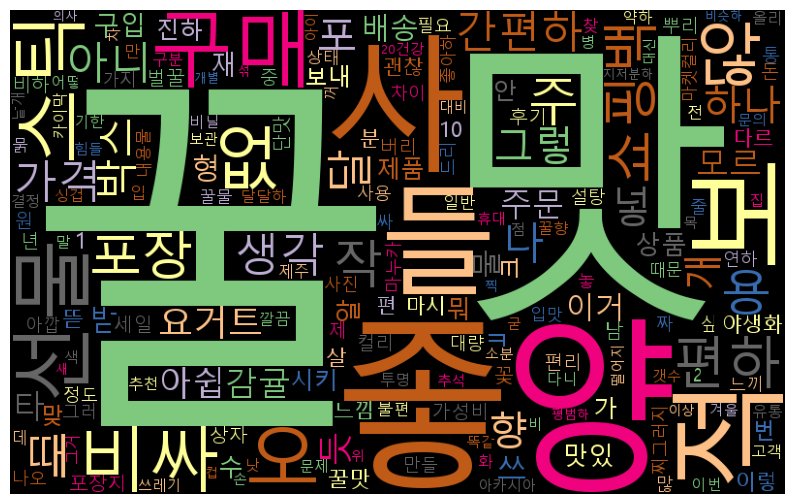

In [42]:
wc_analysis(kurly_data[kurly_data['sentiment_label']==0]['token_nouns_bareun'] + kurly_data[kurly_data['sentiment_label']==0]['token_verbs_bareun'])

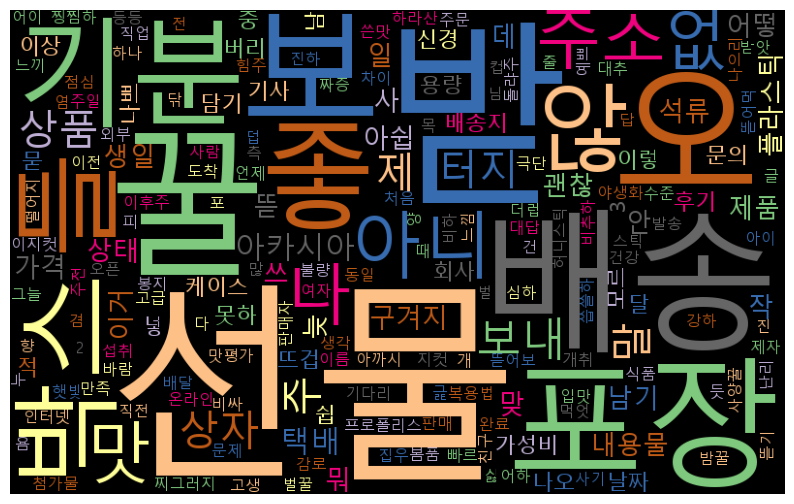

In [43]:
wc_analysis(kakao_data[kakao_data['sentiment_label']==0]['token_nouns_bareun'] + kakao_data[kakao_data['sentiment_label']==0]['token_verbs_bareun'])

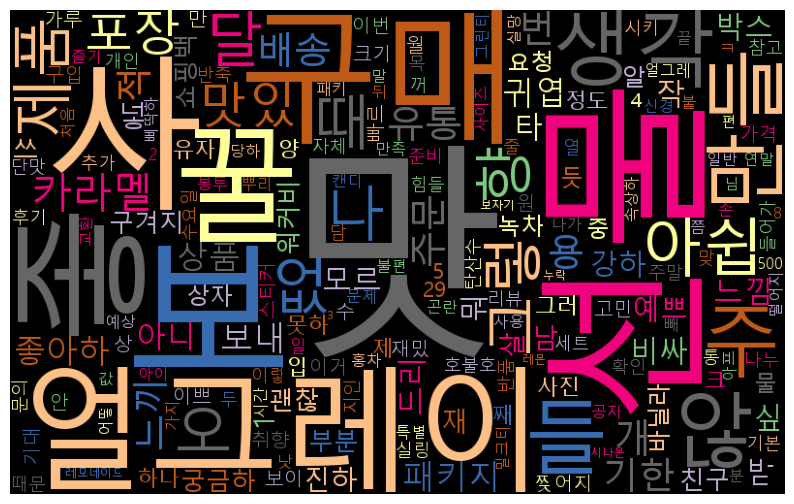

In [54]:
wc_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['token_nouns_bareun'] + workerbee_data[workerbee_data['sentiment_label']==0]['token_verbs_bareun'])

In [19]:
kakao_data[kakao_data['sentiment_label']==0]['ReviewText']

193     상품은 아직 섭취전..  뜨거운 점심에 햇빛쨍해서 박스가 많이 뜨거운데 안에든 꿀은...
343     아까시 감로 피 대추 야생화 등등 별의별 꿀을 다 먹어봤지만 밤꿀보다 쓴맛이 강한 ...
468         후기 이후주는 상품은 완전 다른걸 주네요? ㅠ.  사기맞은듯 한  기분더럽습니다.
643          다른 첨가물없이 꿀과 프로폴리스만 들어있어 건강하고 진한맛 아이는 먹기 싫어함.
1040                                배송빨랐어요 포장은 글케막..예쁘진않음
1079                                   ㅡㅡ나으리 꿀이 너무달니다요 에에
1112              가성비는 만족, 배송은 동일날짜 2건의 선물을 발송 했는데 쫌 늦게 옴
1122                                          ㅠㅠ 잘 안 먹어져영
1128                                상품 안왔습니다. 왜 배송 완료인거죠?
1169                                           잘받았습니다....
1245       한컵용량의 .. 한포의 양이 너무 적어요.3개는 넣어야 맛이 좀 납니다. 아쉽네요.
1252    맛은 아직 안봐서 모르겠는데  포장좀 신경쓰세요. 저는 제가 먹으려고 주문한건데도 ...
1258                    선물로 받은건데 박스가 다 오픈되어 있는상태로 배송되어왔어요
1266                                제품박스가 다 떨어지고, 구겨져 왔어요
1278    오늘 받았습니다근데 세 봉지 중에 하나가뜯겨서  왔어요  문의글 남겼는데  아직 답...
1314                                  남에 집우로 배달온거 말곤 쵝오에염
1375    배송 상태가 너무...안 좋네요. 선물 받은 건데 상자에 담겨오긴 했지만 다 구겨지...
1394          

In [57]:
workerbee_data[workerbee_data['sentiment_label']==0]['ReviewText']

14      생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ...
25                                        얼그레이 향이 꽤 강해요..
47      궁금해서 사봤어요!! 생각보다 얼그레이 향이 강해요ㅎㅎ 다시 사먹을 거 같진 않아요...
52      유통기한이 촉박해요.  내일모레면 5월인데 유통기한이 8월까지인 제품이 왔어요. 두...
58      선물욘으로는 괜찮은데 솔직히 너무달아요 단 거 좋아하는 편인데도 뱉고 싶었어여 그냥...
                              ...                        
4790    구성품중 카라멜은 맛있었어요 꿀은 알수없는 까만가루가 있어  냄새만 맡고 방치  통...
4827    생각보다 되게 작네요ㅠ 선물해야하는데 겉보기에 되게 볼품없어보어요 아쉽네요 꿀로 살...
4975                                   비싼편인거 같아요 너무 작더라고요
5071    선생님께 오랜만에 만나서 드리려고 샀는데 귀엽긴한데.... 좀 약한 것 같습니다  ...
5107    친구 두명에게 선물했는데 이 친구는 별로 안 좋아 했네요. 선물로 하려면 미리 잘 ...
Name: ReviewText, Length: 145, dtype: object

In [89]:
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv")

In [90]:
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv")

In [91]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv")

In [68]:
kakao_data.head(1)

,id,name,brand,sellingPrice,wishCount,reviewCount,product_tag2,ReviewText,rating,review_tag1,review_tag2,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,2270784,국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5,비마스터,27800,2228,1152,[],숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...,4,응원,직장동료,2023-04-10 14:16:48,1,0.990664,"[숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안,...","[따뜻하, 타, 좋, 간편하, 녹, 간편하, 허기지, 간편하, 좋, 믿, 좋, 빠르]"


In [110]:
kakao_neg = kakao_data[kakao_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kakao_neg['platform'] = 'kakao'

In [72]:
kurly_data.head(1)

,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewTime,ReviewLike,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun
0,5136210,일반,박**,[바로생활] 아카시아꿀 스틱 10포,작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다. 의심이 많은...,2023.06.23,0,1,0.99409,"[박스, 2, 개, 10, 개, 20, 개, 네, 주문, 의심, 타입, 뭐, 번, ...","[작, 들, 많, 없, 보, 쓰, 보, 나, 없, 맏아보, 힘들, 반갑, 예쁘, 보..."


In [111]:
kurly_neg = kurly_data[kurly_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kurly_neg['platform'] = 'kurly'

In [113]:
workerbee_neg.head(1)

,ProductCode,ProductName,ReviewText,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun,platform
14,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,"생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ...",2023-06-29 19:31:32,0,0.581707,"[생각, 제입, 맛, 친구, 친구, 기대]","[맛있, 주]",workerbee


In [109]:
workerbee_neg = workerbee_data[workerbee_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
workerbee_neg['platform'] = 'workerbee'

In [114]:
neg_review = pd.concat([kurly_neg, workerbee_neg, kakao_neg])

In [116]:
neg_review.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\negative_review.xlsx")

In [3]:
neg_review = pd.read_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\negative_review.xlsx", index_col=0)

In [4]:
neg_review['platform'].value_counts()

platform
kurly        580
workerbee    145
kakao         41
Name: count, dtype: int64

In [126]:
neg_review[neg_review['sentiment_score']>0.9]

,ProductCode,ProductName,ReviewText,ReviewTime,sentiment_label,sentiment_score,token_nouns_bareun,token_verbs_bareun,platform
205,5136210,[바로생활] 아카시아꿀 스틱 10포,두번째 구입인데 이번엔 살짝 비릿한 맛이 .,2023.05.30,0,0.988554,"[번, 째, 구입, 이번, 맛]",[비릿하],kurly
209,5136210,[바로생활] 아카시아꿀 스틱 10포,향좀 안나서 저는 재구매 안할거가타욤,2023.05.29,0,0.943153,"[향, 재, 구매, 타욤]",[나],kurly
214,5136210,[바로생활] 아카시아꿀 스틱 10포,아카시아 향이 짙지 않아요. 사양벌꿀인가요?,2023.05.24,0,0.960166,"[아카시아, 향, 사양벌꿀]","[짙, 않]",kurly
343,5136210,[바로생활] 아카시아꿀 스틱 10포,포장지 양에 맞기 만들어야함 너무 길게 만들었음,2023.04.03,0,0.985050,"[포장지, 양]","[맞, 만들, 길, 만들]",kurly
413,5136210,[바로생활] 아카시아꿀 스틱 10포,음 이건 좀 비추할게요 맛이없어요 그냥,2023.03.07,0,0.996495,"[이거, 맛]",[없],kurly
...,...,...,...,...,...,...,...,...,...
1858,5620838,"미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,...",너무 용량들이 작아서 실속은 그다지 없는 것 같아요.,2023-01-29 15:50:18,0,0.994425,"[용량, 들, 실속]","[작, 없]",kakao
1864,2184492,"""하루1포 야생화벌꿀"" 허니티톡 100%국내산 천연벌꿀스틱(20포)",주소 배송지를 아무 주소로 보내면 어떻게여?? 택배회사가 주소 이상하다고 연락받았어...,2020-11-07 12:12:35,0,0.996138,"[주소, 배송지, 주소, 택배, 회사, 주소, 이상, 연락, 택배, 회사, 주소, ...","[보내, 어떻, 받, 받]",kakao
1887,2184488,"(1+1/총40포) ""하루1포 야생화벌꿀"" 허니티톡 100%국내산 천연벌꿀스틱",뭔가했더니 잡꿀이네요..달긴한데..음.굳이 내돈주고 사먹을까싶을지는.,2020-11-27 20:38:18,0,0.972345,"[뭐, 잡꿀, 나, 돈]","[달, 주, 사, 싶]",kakao
1901,6651221,끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용,이거 유통기한 지난 것 같은데 이게 맞나요??,2023-06-10 11:18:02,0,0.980331,"[이거, 유통, 기한, 이거]","[지나, 맞]",kakao


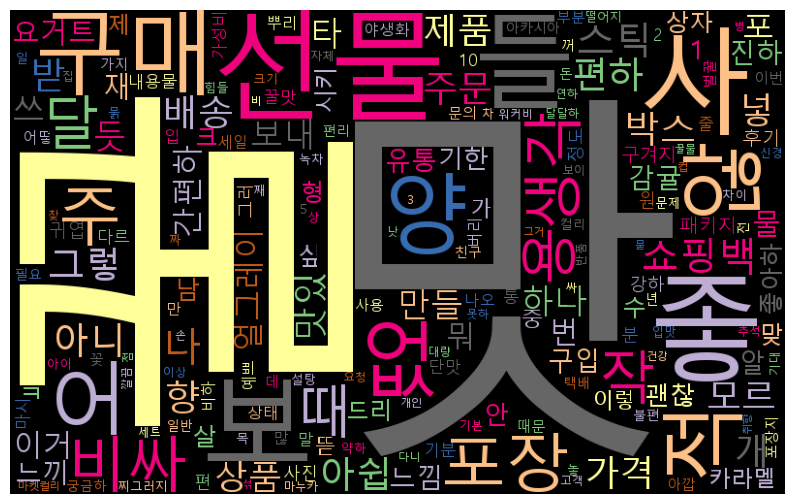

In [97]:
wc_analysis(neg_review['token_nouns_bareun'] + neg_review['token_verbs_bareun'])

In [105]:
frequency_analysis(neg_review['token_nouns_bareun'], 500).head(10)

,Token,Frequency
0,맛,182
1,꿀,172
2,선물,127
3,구매,93
4,양,87
5,포장,73
6,생각,61
7,용,60
8,쇼핑백,56
9,때,55


포장 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


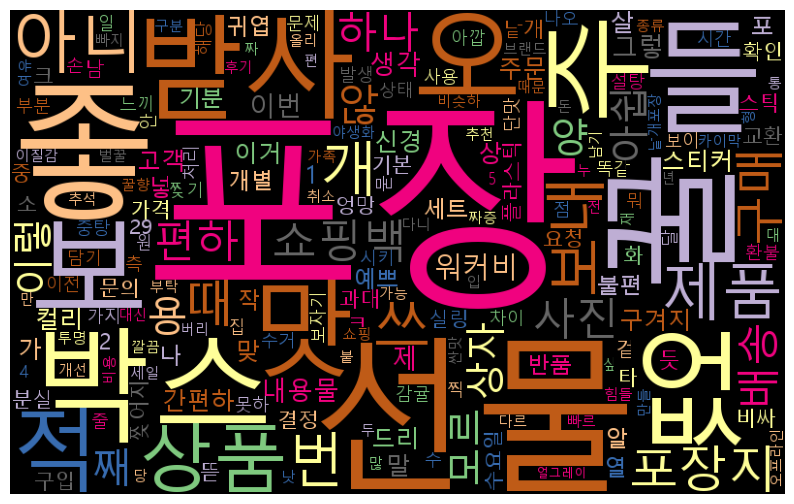

In [108]:
wc_kw(neg_review, 3, '포장')

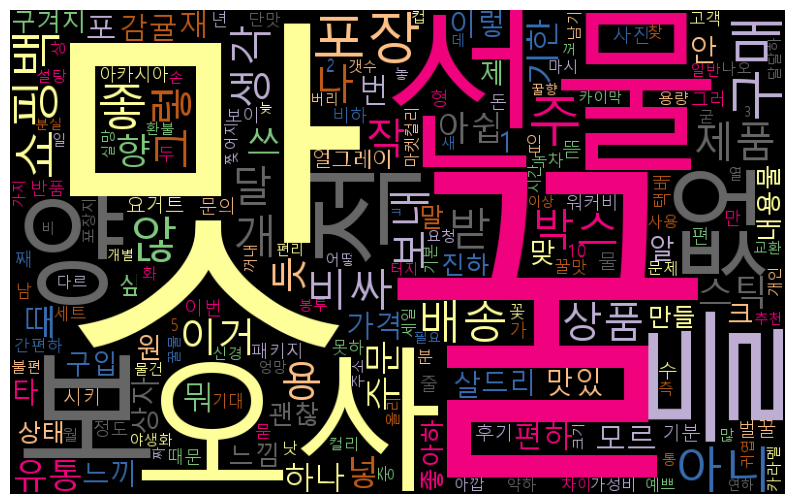

In [127]:
wc_analysis(neg_review[neg_review['sentiment_score']>0.9]['token_nouns_bareun'] + neg_review[neg_review['sentiment_score']>0.9]['token_verbs_bareun'])

In [436]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_analysis.csv")
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_analysis.csv")
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_analysis.csv")